# Initialize

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Data


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
dfTips = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/final_data.csv')


In [14]:
dfTips.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [15]:
dfTips.describe(include='all')

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754,10754,10754,10754,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,...,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
unique,10754,374,10584,16,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,/david-de-gea/profil/spieler/59377,Daejeon Hana Citizen,Paulinho,Defender Centre-Back,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,46,6,1821,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,...,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,NaN,NaN,NaN,NaN,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,...,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,NaN,NaN,NaN,NaN,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,NaN,NaN,NaN,NaN,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,...,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,NaN,NaN,NaN,NaN,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,...,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,NaN,NaN,NaN,NaN,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,...,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000


# Let's Fit a Regression Model to Predict Tip

In [18]:
# Assigning independent(Y) and dependent(X) variables
X = dfTips.loc[:,['height','age', 'appearance', 'goals', 'assists', 'yellow cards', 'goals conceded', 'clean sheets', 'minutes played', 'days_injured', 'games_injured', 'award', 'highest_value', 'position_encoded', 'winger']]
Y = dfTips.loc[:,['current_value']]

In [19]:
# Fitting linear regression model - aka train model
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression()

In [20]:
# Displaying regression model
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 [5245545.7471418]
Coefficients: 
 [[ 9.95010292e+02 -2.17905592e+05 -5.13338166e+04  7.89423153e+05
   1.14437478e+06  7.26798107e+04 -2.86607112e+05  3.15843740e+04
   1.16521536e+03  4.20461434e+03 -4.93100031e+04 -3.32977863e+05
   6.05773672e-01 -3.19556160e+04 -5.70214769e+04]]


In [21]:
# Generating new prediction - aka run scoring model
New_height = 180.0
New_age = 27
New_appearance = 37
New_goals = 0.2
New_assists = 0.1
New_yellow_cards = 0.2
New_goals_conceded = 0.1
New_clean_sheets = 0.04
New_minutes_played = 3000
New_days_injured = 110
New_games_injured = 16
New_award = 2
New_highest_value = 61500000
New_position_encoded = 1
New_winger = 0

print ('Predicted Current Value: \n', regr.predict([[New_height, New_age, New_appearance, New_goals, New_assists, New_yellow_cards, New_goals_conceded, New_clean_sheets, New_minutes_played, New_days_injured, New_games_injured, New_award, New_highest_value, New_position_encoded, New_winger]]))

Predicted Current Value: 
 [[37627669.23866589]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


According to the new data, the new current value is predicted as $37,628,669.

Histogram of current value where the bins cover $1000000 increments

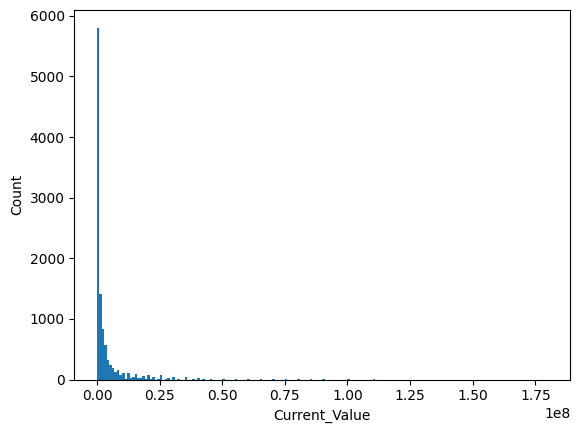

In [20]:
# Set data fields
y = dfTips.loc[:,'current_value']

# Set histogram parameters
binwidth = 1000000.0
binrange=np.arange(min(y), max(y) + binwidth, binwidth)

# Show plot
plt.hist(y, bins=binrange)
plt.xlabel('Current_Value')
plt.ylabel('Count')
plt.show()

Histogram of increase in current value by 9000000





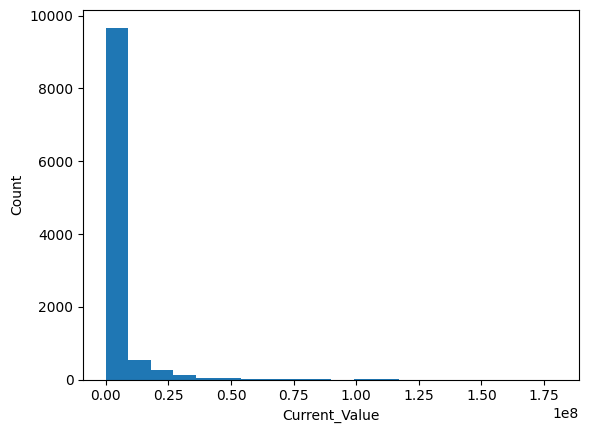

In [23]:
# Set data fields
y = dfTips.loc[:,'current_value']

# Set histogram parameters
binwidth = 9000000.0
binrange=np.arange(min(y), max(y) + binwidth, binwidth)

# Show plot
plt.hist(y, bins=binrange)
plt.xlabel('Current_Value')
plt.ylabel('Count')
plt.show()

Skewness: The distribution is highly right-skewed. Most football players have a relatively low market value, while a few players have exceptionally high market values.

Concentration: The vast majority of players have a market value clustered towards the lower end of the scale. The count decreases sharply as the market value increases.

Outliers: The presence of a long tail towards the right suggests that there are outliers—players with very high market values. These are likely the top-tier players in the market.

Bins and Scale: The x-axis covers a wide range, up to around 175 million (1.75e8), which shows that the dataset includes some very highly valued players.

Distribution Shape: The histogram's shape is indicative of a typical economic distribution where a small number of individuals (players, in this case) hold a significant portion of the total value.

In this type of distribution, a few items (or individuals) have much higher values compared to the majority.

Scatterplot of current_value vs. height



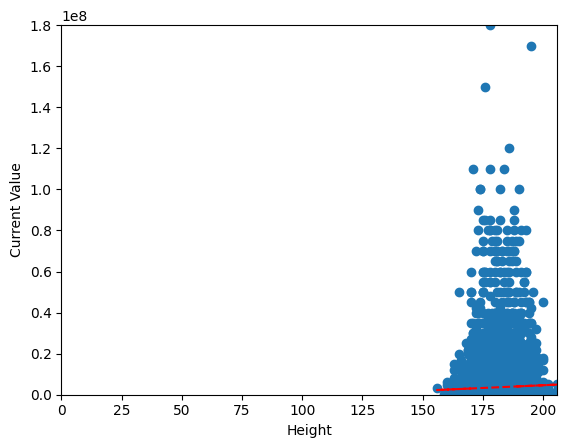

In [25]:
# Set data fields
x = dfTips.loc[:,'height']
y = dfTips.loc[:,'current_value']

# Generate trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# Show plot
plt.scatter(x, y)
plt.plot(x,p(x),"r--")
plt.xlim(0,np.max(dfTips.loc[:,'height']))
plt.ylim(0,np.max(dfTips.loc[:,'current_value']))
plt.xlabel('Height')
plt.ylabel('Current Value')
plt.show()

From this scatter plot, it can be said that there is little to no correlation between the height and the current market value of football players.

Scatterplot of current_value vs. age



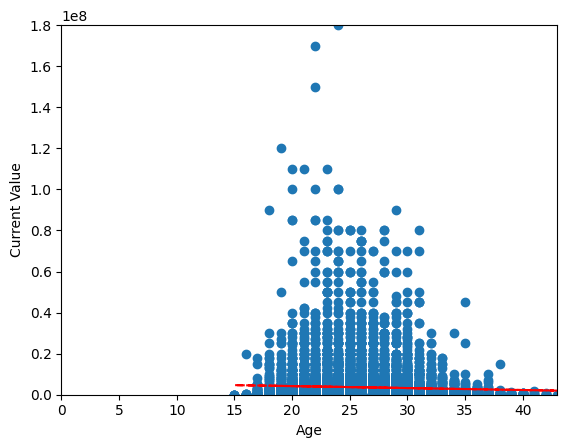

In [26]:
# Set data fields
x = dfTips.loc[:,'age']
y = dfTips.loc[:,'current_value']

# Generate trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# Show plot
plt.scatter(x, y)
plt.plot(x,p(x),"r--")
plt.xlim(0,np.max(dfTips.loc[:,'age']))
plt.ylim(0,np.max(dfTips.loc[:,'current_value']))
plt.xlabel('Age')
plt.ylabel('Current Value')
plt.show()

It can be said that the current value of a football player start to decrease at around 25 years old. The current value is at highest around 20 years.

Scatterplot of current_value vs. highest value

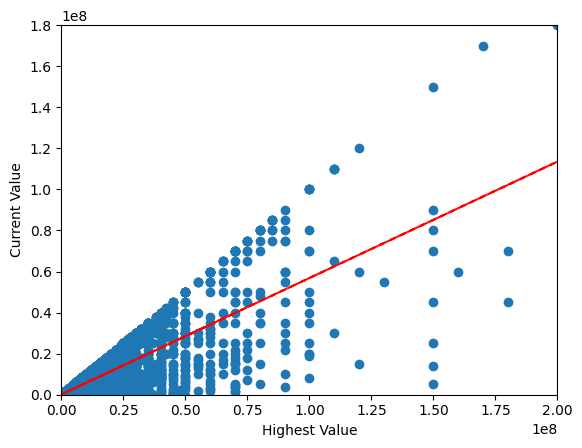

In [28]:
# Set data fields
x = dfTips.loc[:,'highest_value']
y = dfTips.loc[:,'current_value']

# Generate trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# Show plot
plt.scatter(x, y)
plt.plot(x,p(x),"r--")
plt.xlim(0,np.max(dfTips.loc[:,'highest_value']))
plt.ylim(0,np.max(dfTips.loc[:,'current_value']))
plt.xlabel('Highest Value')
plt.ylabel('Current Value')
plt.show()

In general, as the highest value increases, the current value increases as well. We can also see the outliers.

Scatterplot of current_value vs. goals

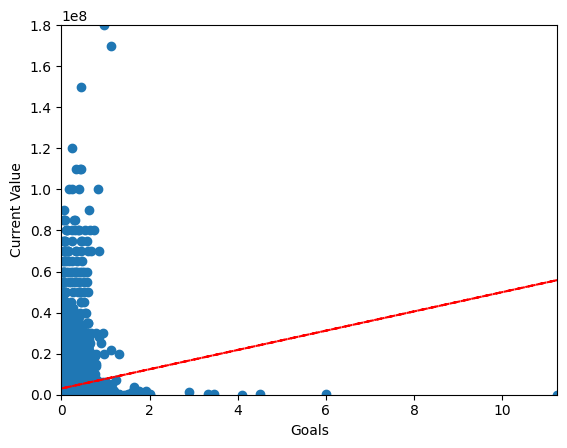

In [29]:
# Set data fields
x = dfTips.loc[:,'goals']
y = dfTips.loc[:,'current_value']

# Generate trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# Show plot
plt.scatter(x, y)
plt.plot(x,p(x),"r--")
plt.xlim(0,np.max(dfTips.loc[:,'goals']))
plt.ylim(0,np.max(dfTips.loc[:,'current_value']))
plt.xlabel('Goals')
plt.ylabel('Current Value')
plt.show()

There is little to no correlation between goals and current value of a player. Even though some players have more goals, their current value is lower.

Scatterplot of current_value vs. appearance

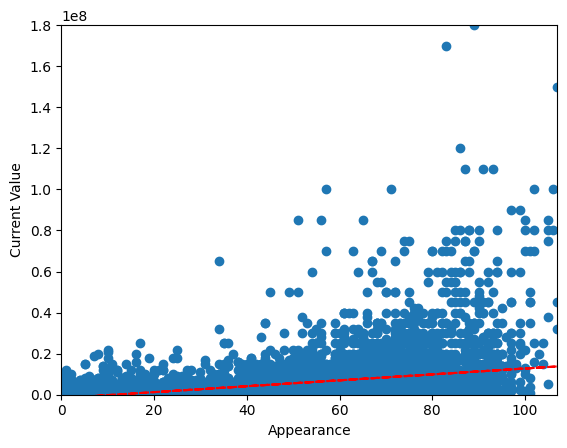

In [30]:
# Set data fields
x = dfTips.loc[:,'appearance']
y = dfTips.loc[:,'current_value']

# Generate trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# Show plot
plt.scatter(x, y)
plt.plot(x,p(x),"r--")
plt.xlim(0,np.max(dfTips.loc[:,'appearance']))
plt.ylim(0,np.max(dfTips.loc[:,'current_value']))
plt.xlabel('Appearance')
plt.ylabel('Current Value')
plt.show()

The distribution seems a bit disorganized with some outliers, but it can be said that as the number of appearance increases, the current value tends to increase as well.